# Deep learning para texto

## NLP (Natural Language Processing - Procesado de Lenguaje Natural): A vista de pájaro

* Lenguajes **diseñados** para máquinas: (ensamblador, LISP, Python, etc). Ingeniero  **diseña** conjunto de **reglas formales** y se comienza a utilizar. Altamente **estructurado** y **riguroso**
* Lenguaje Humano ("natural"): (inglés, mandarín, español, etc). Primero se usa y  **reglas surgen después**. Desordenado, ambiguo, caótico, extenso y en constante cambio. 
* Crear algoritmos que puedan dar sentido al lenguaje natural es un gran problema. **La capacidad de comprender el lenguaje natural ha eludido a las máquinas durante mucho tiempo**. 
* Los primeros intentos de construir sistemas de procesamiento de lenguaje natural (NLP) se hicieron a través de la lente de la "**lingüística aplicada**". No funcionó. El **lenguaje** es rebelde y **no es flexible a la formalización**.

* Reglas hechas a mano: enfoque dominante hasta la década de 1990.  
* Según avanza la década de 90: **computadoras** más **rápidas** + mayor **disponibilidad** de **datos**, ingeniero se pregunta “**¿Podría buscar las reglas dentro de algún tipo de espacio de reglas (los datos), en lugar de tener que inventarlas yo mismo?**" -> **Aprendizaje Automático**. Pasamos a **enfoques de aprendizaje automático** para el **procesamiento del lenguaje natural**. 

1. **Árboles de Decisión**: automatizar el desarrollo del tipo de reglas if/then/else
2. **Enfoques estadísticos**: a.- **regresión logística**. b.- **modelos paramétricos aprendidos** (Frederick Jelinek, investigador  reconocimiento de voz:"Cada vez que despido a un lingüista, el rendimiento del reconocimiento de voz aumenta".

**NLP moderna**: **aprendizaje automático** + **muchos datos** -> dar a las computadoras capacidad  **ingerir un trozo del lenguaje** como entrada y **devolver algo útil**, como predecir lo siguiente: (daros cuenta que **NO es entender el lenguaje**, que es un objetivo más elevado)

* “**¿Cuál es el tema de este texto?**” (**clasificación** de texto)
* “**¿Este texto contiene abusos?**” (**filtrado** de contenido)
* “**¿Este texto suena positivo o negativo?**” (**análisis de sentimiento**)
* "**¿Cuál debería ser la siguiente palabra en esta oración incompleta?**" (**modelado del lenguaje**)
* “**¿Cómo dirías esto en alemán?**” (**traducción**)
* “**¿Cómo resumirías este artículo en un párrafo?**” (**resumen**)
* etc.

Los modelos de procesamiento de texto que entrenaremos **no poseerán una comprensión del lenguaje similar a la humana**; más bien,  **buscan regularidades estadísticas**, lo que resulta ser suficiente. De la misma manera que la **visión artificial es el reconocimiento de patrones aplicado a píxeles**, la NLP es el **reconocimiento de patrones aplicado a palabras**, **oraciones** y **párrafos**.

* De 1990 hasta principios de los 2010 el **enfoque de la investigación** se centró en la **ingeniería de características**. 

* 2014-2015 se investigan las capacidades de **comprensión del lenguaje** de las **redes neuronales recurrentes (RNNs)**, en particular **LSTM**, **algoritmo de procesamiento de secuencias** de finales de la década de 1990 que había permanecido oculto hasta entonces.

* 2015, **Keras** lanza **primera implementación de código abierto** y fácil de usar de **LSTM** 
* De 2015 a 2017, **RNNs dominaron la escena de la NLP**. Modelos **LSTM bidireccionales**, son la **base** en muchas tareas importantes, desde el **resumen** hasta la **respuesta a preguntas y la traducción automática**. 
* 2017-2018, surgió una **nueva arquitectura para reemplazar los RNN**: el **``TRANSFORMER``**. En la actualidad, la mayoría de los sistemas de NLP se basan en ellos.

## Preparando datos de texto

**Deep Learning** (funciones diferenciables), **solo pueden procesar tensores numéricos**: no texto. **Vectorizamos texto:transformar texto en tensores numéricos**. Procesos de vectorización de texto:

* Primero, **estandariza** el texto para que sea **más fácil de procesar**, como convertirlo a **minúsculas** o **eliminar la puntuación**.
* **Divide el texto en unidades** (**tokens**), como **caracteres**, palabras **texto en negrita** o **grupos de palabras**. Esto se llama **tokenización**.
* **Convierte** cada **token** en  **vector numérico**. Por lo general, esto implicará primero indexar todos los tokens presentes en los datos

**De texto en crudo, a vectores**

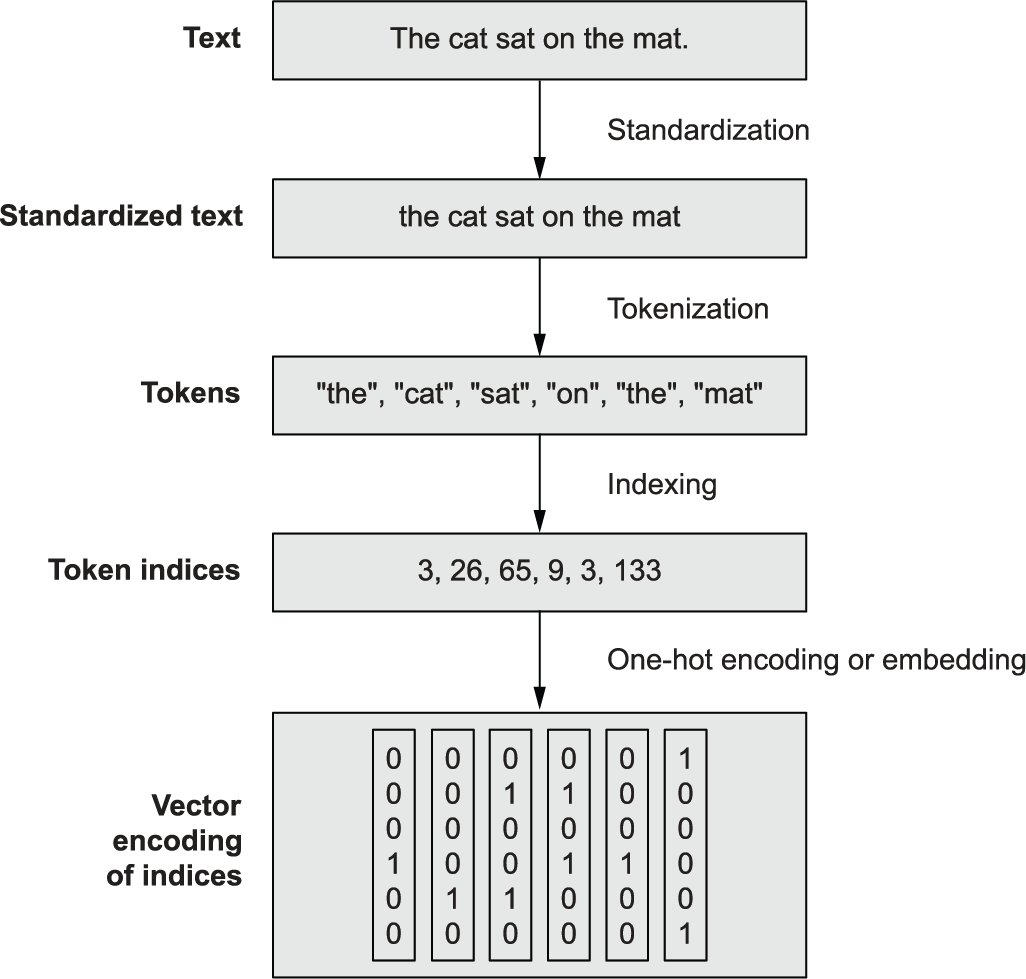

### Estandarización de Texto

Consideremos estas dos frases, similares, casi idénticas pero cuyas cadenas de bytes son muy diferentes:
* ``“sunset came. i was staring at the Mexico sky. Isnt nature splendid??”``
* ``“Sunset came; I stared at the México sky. Isn’t nature splendid?”``

Un modelo de aprendizaje automático no sabe a priori que “i” e “I” son la misma letra, que “é” es una “e” con acento, o que “staring” y “stared” son dos formas de la mismo verbo. 

La **estandarización de texto** es una forma básica de **ingeniería de características** que tiene como objetivo **borrar las diferencias de codificación con las que no desea que se enfrente su modelo**. Tampoco es exclusivo del aprendizaje automático: tendría que hacer lo mismo si estuviera creando un motor de búsqueda. Cosas que podemos hacer:

1. Convertir **todas a minúsculas** y eliminar los caracteres de puntuación
2. Convertir **caracteres especiales a una forma estándar**, como reemplazar "é" con "e", "æ" con "ae"
3. Más sofisticado, **derivación** o **stemming**: convertir variaciones de un término (como diferentes formas conjugadas de un verbo) en una sola representación compartida, como convertir "caught" y "been catching" en "catch").

Nuestras dos **oraciones similares** finalmente terminarían con una **codificación idéntica**: ``“sunset came i [stare] at the mexico sky isnt nature splendid”``. Con estas técnicas de estandarización, nuestro modelo **requerirá menos datos de entrenamiento** y **generalizará mejor**.

La estandarización puede **borrar cierta cantidad de información**, con lo que hay que tener **en cuenta el contexto** (por ejemplo, si está escribiendo un modelo que extrae preguntas de artículos de entrevistas, definitivamente deberíamos tratar "?" como un token separado en lugar de obviarlo, porque es una señal útil para esta tarea específica.

### División de Texto (splitting y tokenization)

Una vez **estandarizado**, el texto necesita ser **dividido en unidades** (**tokens**) para poder ser **vectorizado**. La **tokenización** se puede hacer esto de **tres maneras** diferentes: 

* **Tokenización a nivel de palabra**: tokens son **subcadenas separadas por espacios** (o separadas por puntuación). (variante: dividir aún más cuando corresponda("staring" -> "star+ing" o "called" -> "call+ed"). 
* **Tokenización N-gram**: tokens son **grupos de N palabras consecutivas**. “the cat” o “he was” (tokens 2-gram o bigramas).
* **Tokenización a nivel de caracter**: **cada caracter es su propio token**. (rara vez se usa salvo **generación de texto** o el **reconocimiento de voz**) 

2 tipos de modelos de procesamiento de texto: 
1. Se **preocupan por el orden de las palabras** (**modelos de secuencia**) -> usan **tokenización a nivel de palabra**
2. Los que **tratan las palabras de entrada como un conjunto**, **descartando su orden original** (modelos de **bolsa de palabras** - bag-of-words) -> usan **tokenización N-gram** porque son una **forma de inyectar artificialmente una pequeña cantidad de información de orden de palabras** local **en el modelo**.

**ENTENDIENDO N-GRAMS Y BOLSA DE PALABRAS**

``“the cat sat on the mat.”``

* Descomposición en un conjunto (sin orden específico) de tokens o bolsa **2-gram**: ``{"the", "the cat", "cat", "cat sat", "sat",
 "sat on", "on", "on the", "the mat", "mat"}``

* Descomposición en un conjunto (sin orden específico) de tokens o bolsa **3-gram**: ``{"the", "the cat", "cat", "cat sat", "the cat sat", "sat", "sat on", "on", "cat sat on", "on the", "sat on the", "the mat", "mat", "on the mat"}``

Como la **bolsa de palabras no es un método de tokenización que preserva el orden** (los tokens generados se entienden como un conjunto, no como una secuencia, y **se pierde la estructura general de las oraciones**), tiende a usarse en **procesamiento de lenguaje superficial en lugar de modelos de aprendizaje profundo**. 

La **extracción de N-gramas es una forma de ingeniería de características**, y los **modelos secuenciales de deep learning eliminan este enfoque manual** y **lo reemplazan con el aprendizaje de características jerárquico**. Los **convnets unidimensionales**, las redes neuronales recurrentes (**RNNs**) y los **Transformers** son **capaces de aprender representaciones de grupos de palabras y caracteres sin que se les informe explícitamente sobre la existencia de dichos grupos, al observar secuencias continuas de palabras o caracteres**.


### Indexado de vocabulario

Una vez que su texto se divide en tokens, debe **codificar cada token en una representación numérica**. Se crea un **índice de todos los términos** que se encuentran en los datos de entrenamiento (el **"vocabulario"**), y **se asigna un entero único a cada entrada en el vocabulario**. Algo como esto:

```
vocabulary = {} 
for text in dataset:
    text = standardize(text)
    tokens = tokenize(text)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = len(vocabulary)
```

In [1]:
vocabulary = {} 
tokens={"the", "cat", "sat", "on", "the", "mat"}
for token in tokens:
    if token not in vocabulary:
        vocabulary[token] = len(vocabulary)
print(vocabulary)

{'cat': 0, 'mat': 1, 'the': 2, 'sat': 3, 'on': 4}


A continuación, podemos **convertir ese número entero en una codificación vectorial que puede ser procesada por una red neuronal**, como un vector único:

```
def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1 
    return vector
```

In [2]:
import numpy as np

def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1 
    return vector
print(one_hot_encode_token("the"))
print(one_hot_encode_token("chirimoya"))

[0. 0. 1. 0. 0.]


KeyError: ignored

* Es común **restringir el vocabulario** a  las **20k o 30k palabras más comunes** que se encuentran en los datos de entrenamiento. Los términos con pocas ocurrencias dan como resultado un espacio de características excesivamente (no aportan información relevante). Ya lo hicimos así con IMDB
* Cuando **buscamos un nuevo token** en nuestro índice de vocabulario, **es posible que no exista**. Es posible que sus datos de entrenamiento no contengan ninguna instancia de la palabra "chirimoya" (o tal vez la excluyó de su índice porque era demasiado rara), por lo que hacer ``token_index = vocabulario["chirimoya"]`` puede generar un ``KeyError``. Para manejar esto, debe usar un índice **"fuera de vocabulario"** (abreviado como **índice OOV**), **un comodín para cualquier token que no estaba en el índice**. Por lo general, es el índice 1: en realidad estás haciendo ``token_index = vocabulario.get (token, 1)``. Al decodificar una secuencia de números enteros en palabras, reemplazará 1 (el cero ya está reservado para el **token de máscara**) con algo como "[UNK]" (que llamaría "token OOV"). 
* Hay **dos tokens especiales**: el **token OOV (índice 1)** -> "aquí había una palabra que no reconocimos" y el **token de máscara (índice 0)** -> "ignórame, no soy una palabra". Se usa para **rellenar datos de secuencias**: debido a que los lotes de datos deben ser contiguos, **todas las secuencias en un lote de datos de secuencias deben tener la misma longitud**, por lo que **las secuencias más cortas deben rellenarse con la longitud de la secuencia más larga**. Si queremos hacer un lote de datos con las secuencias ``[5, 7, 124, 4, 89]`` y ``[8, 34, 21]``, tendría que verse así:

```
[[5,  7, 124, 4, 89]
 [8, 34,  21, 0,  0]]
```

### Usando la capa ``TextVectorization``

Cada paso que hemos presentado hasta ahora sería muy fácil de implementar en Python puro. Tal vez podríamos escribir algo como esto:

In [3]:
import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
# Haiku del poeta Hokushi
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

In [4]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)

[2, 3, 5, 7, 1, 5, 6]


In [5]:
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


Esto no es eficaz. En la práctica, tabajaremos con la capa Keras ``TextVectorization``, que es **rápida y eficiente** y se puede colocar directamente en un pipeline ``tf.data`` o en un modelo Keras. Así es como se ve la capa ``TextVectorization``:

In [6]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    # Configura la capa para devolver secuencias de palabras 
    # codificadas como índices enteros. Hay varios otros modos 
    # de salida disponibles, que veremos en acción
    output_mode="int",
)

* ``TextVectorization``: Configuración por defecto -> **estandarización**(**"convertir a minúsculas y eliminar puntuación"**) -> **tokenización** (**"dividir en espacios en blanco"**)
* Tanto para la **estandarización** como para la **tokenización** se pueden definir **funciones personalizadas** que operen en tensores ``tf.string``, no en cadenas Python normales (es muy flexible)
* El comportamiento predeterminado de la capa es equivalente a lo siguiente:

In [7]:
import re
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
    # Convierte cadenas en minúsculas
    lowercase_string = tf.strings.lower(string_tensor)
    # Reemplazamos los caracteres de puntuación con la cadena vacía
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
    # Cadenas divididas en espacios en blanco
    return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

Para **indexar el vocabulario de un texto**, llamamos al método ``adapt()`` de la capa con un objeto ``Dataset`` que produce cadenas, o simplemente con una lista de cadenas de Python:

In [8]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
text_vectorization.adapt(dataset)

Tened en cuenta que podemos recuperar el vocabulario calculado a través de ``get_vocabulary()``; esto puede ser útil si necesitamos convertir texto codificado como secuencias enteras en palabras. Las dos primeras entradas en el vocabulario son el token de máscara (índice 0) y el token OOV (índice 1). Las entradas en la lista de vocabulario se ordenan por frecuencia, por lo que con un conjunto de datos del mundo real, las palabras muy comunes como "the" o "a" aparecerían primero.

**Mostrando el vocabulario**

In [9]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

Como demostración, intentamos codificar y luego decodificar una oración de ejemplo:

In [10]:
vocabulary = text_vectorization.get_vocabulary()
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = text_vectorization(test_sentence)
print(encoded_sentence)

tf.Tensor([ 7  3  5  9  1  5 10], shape=(7,), dtype=int64)


In [11]:
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


**UTILIZACIÓN DE LA CAPA ``TEXTVECTORIZATION`` EN UN PIPELINE DE ``TF.DATA`` O COMO PARTE DE UN MODELO**

* Como ``TextVectorization`` es principalmente una operación de **búsqueda de diccionario**, no se puede ejecutar en una GPU (o TPU), **solo en una CPU**. -> Si estamos entrenando nuestro modelo en una GPU, nuestra capa **``TextVectorization`` se ejecutará en la CPU antes de enviar su salida a la GPU**. 
* Esto tiene grandes **implicaciones** en el **rendimiento**. Hay **dos formas** en las que podríamos **usar la capa ``TextVectorization``**. La **primera** opción es **ponerlo en el pipeline ``tf.data``**, así:

In [ ]:
# string_dataset sería un conjunto de 
# datos que produce tensores de cadena
int_sequence_dataset = string_dataset.map(
    text_vectorization,
    # El argumento num_parallel_calls se utiliza 
    # para paralelizar la llamada map() en varios 
    # núcleos de CPU
    num_parallel_calls=4)

La **segunda opción** es **convertirlo en parte del modelo** (después de todo, es una capa de Keras), así:

In [ ]:
# Crea una entrada simbólica que espera cadenas
text_input = keras.Input(shape=(), dtype="string")
# Le aplicamos la capa de vectorización de texto
vectorized_text = text_vectorization(text_input)
# Podemos seguir encadenando nuevas capas en la parte superior, 
# solo nuestro modelo de API funcional habitual.
embedded_input = keras.layers.Embedding(...)(vectorized_text)
output = ...
model = keras.Model(text_input, output)

* En la segunda opción, **cuando el paso de vectorización es parte del modelo**, ocurrirá **sincrónicamente con el resto del modelo**. Esto significa que en cada paso de entrenamiento, **el resto del modelo** (ubicado en la GPU) **tendrá que esperar a que la salida de la capa ``TextVectorization``** (ubicada en la CPU) **esté lista para comenzar a trabajar**. 
* En la primera opción, cuando **colocamos la capa en la pipeline ``tf.data``** se realiza un **preprocesamiento asíncrono** de nuestros datos en la CPU: mientras la **GPU ejecuta el modelo en un lote de datos vectorizados**, la **CPU se mantiene ocupada al vectorizar el siguiente lote de cadenas sin procesar**.

**CONCLUSIÓN:**, si estamos entrenando el modelo en **GPU o TPU**, elegiremos la primera opción (colocamos la capa ``TextVectorization`` en la pipeline ``tf.data``) para obtener el mejor rendimiento. Esto es lo que haremos en todos los ejemplos prácticos que siguen. Sin embargo, c**uando se entrena en una CPU**, el **procesamiento síncrono** está bien: obtendremos el **100% de utilización de nuestros núcleos**, independientemente de la opción que elijamos.

Si tuvieramos que **exportar nuestro modelo a un entorno de producción**, nos gustaría enviar un **modelo que acepte cadenas sin procesar como entrada** (segunda opción); de lo contrario, **tendríamos que volver a implementar la estandarización y tokenización de texto en nuestro entorno de producción** (¿tal vez en JavaScript?), y correríamos el riesgo de introducir pequeñas discrepancias de preprocesamiento que dañarían la precisión del modelo. 

Afortunadamente, la capa **``TextVectorization`` nos permite incluir el preprocesamiento de texto directamente en nuestro modelo**, lo que facilita su implementación, incluso si originalmente estábamos usando la capa como parte de un pipeline de ``tf.data``. 

## Dos enfoques para representar grupos de palabras: Conjuntos y secuencias

* Uno modelo de machine learning **representa palabras** individuales como **características categóricas** (valores de un conjunto predefinido). Deben **codificarse** como **dimensiones en un espacio de características** o como **vectores de categoría** (vectores de palabras en este caso). Pero **¿Cómo codificar la forma en que las palabras se entretejen en oraciones, es decir, el orden de las palabras?** 

* Interesante el **problema del orden en el lenguaje natural** (las palabras en una oración no tienen un orden canónico natural): Distintos idiomas ordenan palabras de formas muy diferentes, incluso en el mismo idioma (podemos decir lo mismo de diferentes maneras reorganizando un poco las palabras). Una oración corta con orden aleatorio de las palabras no es difícil de entender. Además, existe la **ambiguedad**. **El orden es claramente importante, pero su relación con el significado no es sencilla**. 

* **Diferentes representaciones del orden** de las palabras derivan en **diferentes tipos de arquitecturas de NLP**.
 * **Lo más simple**: **descartar el orden** y tratar el **texto como un conjunto desordenado de palabras** -> **modelos de bolsa de palabras**
 * Las **palabras se procesarse** estrictamente **en el orden en que aparecen**, una a la vez, **como pasos en una serie temporal**; luego **podríamos aprovecharlos modelos RNN**
 * **Enfoque híbrido**: la **arquitectura de Transformer** es técnicamente **independiente del orden**, pero **inyecta información de posición de palabra** en las representaciones que procesa. Esto le permite **mirar simultáneamente diferentes partes de una oración** (a diferencia de RNN) sin dejar de ser consciente del orden. 

Dado que tanto las **RNN** como los **Transformers** tienen **en cuenta el orden de las palabras**, estos modelos se denominan **modelos de secuencia**. 

Al principio del NLP, solo tenía en cuenta modelos de **bolsa de palabras**. El **modelo de secuencia** se empezó a usar a partir de  2015 con las RNNs. **Hoy, ambos enfoques siguen siendo relevantes**.  

Veremos ambos enfoque en el conjunto de datos de clasificación de opiniones de reseñas de películas de IMDB.

### Preparación de los datos de reseñas de películas de IMDB

Comencemos por descargar el conjunto de datos de la página de Stanford de Andrew Maas y descomprimirlo:

In [13]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  8908k      0  0:00:09  0:00:09 --:--:-- 16.6M


Nos queda un directorio llamado ``aclImdb``, con la siguiente estructura:

```
aclImdb/
...train/
......pos/
......neg/
...test/
......pos/
......neg/
```

Por ejemplo, el directorio ``train/pos/`` contiene un conjunto de 12.500 archivos de texto, cada uno de los cuales contiene el cuerpo de texto de una reseña de película con sentimiento positivo para usarse como datos de capacitación. Las reseñas de sentimiento negativo están en los directorios "neg". En total, hay 25.000 archivos de texto para entrenamiento y otros 25.000 para pruebas.

Borramos el subdirectorio ``train/unsup`` que no necesitamos:

In [14]:
!rm -r aclImdb/train/unsup

Echamos un vistazo al contenido de algunos de estos archivos de texto. **Inspeccionar siempre los datos antes de sumergirnos en el modelado**. Eso nos permitirá ganar intuición de lo que está haciendo nuestro modelo:

In [15]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

A continuación, **preparemos un conjunto de validación** separando el **20%** de los archivos de texto de entrenamiento en un nuevo directorio, ``aclImdb/val``:

In [16]:
import os, pathlib, shutil, random

base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    # Mezclamos al azar la lista de archivos de 
    # entrenamiento usando una semilla, para asegurarnos 
    # el obtener el mismo conjunto de validación cada vez 
    # que ejecutamos el código.
    random.Random(1337).shuffle(files)
    # Tomamos el 20% de los archivos de entrenamiento para 
    # usarlos para la validación.
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    # Movemos los archivos a aclImdb/val/neg y aclImdb/val/pos
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)

Usamos la utilidad **``text_dataset_from_directory``** para **crear un conjunto de datos por lotes de textos y sus etiquetas** para una estructura de directorio. Vamos a **crear tres objetos dataset** para **entrenamiento**, **validación** y **prueba**:

In [17]:
from tensorflow import keras
batch_size = 32

# Al ejecutar esta línea debería dar como salida 
# "Encontrados 20000 archivos pertenecientes a 2 clases"
# Si vemos "Se encontraron 70000 archivos pertenecientes a 3 clases",
# significa que olvidamos eliminar el directorio aclImdb/train/unsup
train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


Estos datasets producen entradas que son tensores TensorFlow ``tf.string`` y objetivos que son tensores ``int32`` que codifican el valor "0" o "1".

**Visualización de las formas y dtypes del primer lote**

In [18]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor(b'No awards show can please all the people. Clearly if your favorite movies didn\'t win, you will say the show wasn\'t very good. That\'s understandable.<br /><br />However, the 74th Annual Academy Awards will be remembered for one magical moment of Hollywood history:<br /><br />Woody Allen\'s first appearance ever at the Academy Awards.<br /><br />Allen has often shunned the awards as being self-aggrandizing and pointless, and has never attended -- even though he has won several of the coveted awards.<br /><br />When the 74th Academy Awards were held, the nation was still mourning the loss of life in the collapse of the World Trade Centers in New York. When it came time to pay tribute to the city of New York, they decided to show a video of the great movie moments form the city of cities. Then the announcer simply said:<br /><br />"Ladies and gentleman, Oscar A

Todo listo. Ahora intentemos aprender algo de estos datos.

### Procesando palabras como un conjunto: el enfoque de la bolsa de palabras

La **forma más sencilla de codificar un fragmento de texto** para que lo procese un modelo de aprendizaje automático es **descartar el orden y tratarlo como un conjunto (una "bolsa") de tokens**. Podriamos o **mirar palabras individuales (unigramas)** o **intentar recuperar información de orden local mirando grupos de tokens consecutivos (N-gramas)**. 

#### Palabras sueltas (unigramas) con codificación binaria

Si usamos una bolsa de palabras sueltas, la oración "el gato se sentó en el tapete" se convierte en:
``` 
{"gato", "tapete", "en", "sat", "el"}
``` 
* **Ventaja de esta codificación**: se puede **representar un texto completo como un solo vector**, donde **cada entrada es un indicador de presencia para una palabra** dada. 
* Al usar la **codificación binaria (multi-hot)**, **codificaría un texto como un vector con tantas dimensiones como palabras hay en su vocabulario**, con 0 en casi todas partes y **algunos 1 para las dimensiones que codifican las palabras presentes en el texto**.

Vamos a probar esto en nuestra tarea. Primero, procesaremos nuestro dataset con el texto en bruto con una capa de ``TextVectorization`` para que produzcan **vectores de palabras codificadas en binario con codificación multi-hot**. Nuestra capa **solo mirará palabras sueltas (es decir, unigramas)**.

**Preprocesando nuestros datasets con una capa `TextVectorization`**

In [19]:
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(
    # Limitamos el vocabulario a las 20.000 palabras 
    # más frecuentes. De lo contrario, estaríamos 
    # indexando cada palabra en los datos de 
    # entrenamiento, potencialmente decenas de miles 
    # de términos que solo aparecen una o dos veces 
    # y, por lo tanto, no son informativos. En general, 
    # 20.000 es el tamaño de vocabulario adecuado para 
    # la clasificación de textos.
    max_tokens=20000,
    # Codifica los tokens de salida como vectores 
    # binarios multi-hot.
    output_mode="multi_hot",
)
# Prepara un conjunto de datos que solo produzca 
# entradas de texto en bruto (sin etiquetas).
text_only_train_ds = train_ds.map(lambda x, y: x)
# Utilizamos ese conjunto de datos para indexar el 
# vocabulario del conjunto de datos a través del 
# método adapt()
text_vectorization.adapt(text_only_train_ds)

# Preparamos versiones procesadas de nuestro 
# dataset de entrenamiento, validación y prueba. 
# Nos aseguramos de especificar num_parallel_calls 
# para aprovechar múltiples núcleos de CPU.
binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Podemos intentar inspeccionar la salida de uno de estos conjuntos de datos:

**Inspeccionando la salida de nuestro dataset de unigrama binario**

In [20]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(0, shape=(), dtype=int32)


A continuación, escribimos una función de construcción de modelos reutilizable que usaremos durante esta sección:

**Nuestra utilidad de construcción de modelos**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

Finalmente **entrenamos y probamos el modelo de unigrama binario**

In [22]:
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_1gram.keras",
                                    save_best_only=True)
]
# Llamamos a cache() en los datasets para almacenarlos 
# en memoria: de esta manera, solo haremos el 
# preprocesamiento una vez, durante la primera época, 
# y reutilizaremos los textos preprocesados para las 
# siguientes épocas. Esto solo se puede hacer si los 
# datos son lo suficientemente pequeños como para 
# caber en la memoria.
model.fit(binary_1gram_train_ds.cache(),
          validation_data=binary_1gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 16)                320016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 11s 11ms/step - loss: 0.3997 - accuracy: 0.8349 - val_loss: 0.3129 - val_accuracy: 0.8722
Epoch 2/10
625/625 [=======================

* **Precisión: 88,7%**: ¡no está mal! (dataset de dos clases equilibrado: naive baseline=50%). (95% es la mejor puntuación que se puede lograr en este dataset)

#### Bigramas con codificación binaria

* **Descartar el orden de las palabras es muy reduccionista** (incluso conceptos atómicos pueden expresarse mediante varias palabras: "Estados Unidos") 
* Por esta razón, habría que **reinyectar información de orden local en nuestra representación de bolsa de palabras mirando N-gramas en lugar de palabras individuales** (más comúnmente, **bigramas**).

Con **bigramas**, nuestra oración se convierte en

```
{"el", "el gato", "gato", "gato sentado", "sentado", "se sentó en", "en", "en la", "la estera", "la estera"}
```

* La capa **``TextVectorization`` se puede configurar para devolver N-gramas arbitrarios**: bigramas, trigramas, etc. Simplemente pasando un argumento ``ngrams=N`` como vemos ahora:

**Configurando la capa `TextVectorization` para devolver bigramas**

In [23]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

Probemos cómo funciona nuestro modelo cuando **se entrena en esas bolsas de bigramas codificadas en binario**.

**Entrenamiento y prueba del modelo de bigrama binario**

In [24]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
                                    save_best_only=True)
]
model.fit(binary_2gram_train_ds.cache(),
          validation_data=binary_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_2 (Dense)             (None, 16)                320016    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 0.4027 - accuracy: 0.8336 - val_loss: 0.2976 - val_accuracy: 0.8800
Epoch 2/10
625/625 [======================

* **Precisión :89,6%**, ¡una mejora notable! Resulta que **el orden local es bastante importante**.

#### Bigramas con codificado TF-IDF

* Podemos **agregar un poco más de información a esta representación contando cuántas veces ocurre cada palabra o N-grama**, es decir, tomando el **histograma de las palabras** sobre el texto: 

```
{"the": 2, " el gato": 1, "gato": 1, "gato se sentó": 1, "se sentó": 1, "se sentó en": 1, "en": 1, "en el": 1, "el tapete: 1 ", "mat": 1} 
```

* **Fundamental** para la  clasificación de texto, **saber cuántas veces aparece una palabra en una muestra**: cualquier reseña de película lo suficientemente larga puede contener la palabra "terrible" independientemente del sentimiento, pero una reseña que contiene muchas instancias de la palabra "terrible" es probablemente negativa. Así es **como contaría las ocurrencias de bigramas con la capa ``TextVectorization``**.

**Configuración de la capa `TextVectorization` para devolver recuentos de tokens**

In [25]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="count"
)

* **Las palabras "el", "un", "es" y "son" tendrán siempre muchas ocurrencias** (independientemente de lo que trate el texto), **ahogando otras palabras**, a pesar de ser **características** bastante **inútiles** en un contexto de clasificación 

* Esto **lo resolvemos a través de la normalización**. Una opción sería **restando la media y dividiendo por la varianza (calculada en todo el conjunto de datos de entrenamiento)**. Esto tendría sentido. Excepto que **la mayoría de las oraciones vectorizadas consisten casi en su totalidad en ceros** (nuestro ejemplo anterior presenta 12 entradas distintas de cero y 19,988 entradas cero), pero hay que tener en cuenta una propiedad llamada "esparcimiento" o **sparsity**, que **reduce drásticamente la carga de cómputo y reduce el riesgo de sobreajuste**. **Si restáramos la media de cada característica, arruinaríamos el sparsity**. 

* Por lo tanto, **cualquier esquema de normalización que usemos debe ser de solo división**. Entonces, ¿qué debemos usar como denominador? La mejor práctica es hacerlo con algo llamado **normalización TF-IDF**: TF-IDF significa (**Term Frequency, Inverse Document Frequency**)"frecuencia de término, frecuencia de documento inversa".

**COMPRENDIENDO  LA NORMALIZACIÓN TF-IDF** 

* **Cuanta mayor es la frecuencia de aparición de un término en un documento, más importante es ese término para comprender de qué se trata el documento**. 
* Cuanto mayor es la **frecuencia** con la que **aparece un término en todos los documentos** del dataset (como "el" o "un") **hace** justamente lo contrario, **que no sea particularmente informativo**.
* Los términos que **aparecen muchas veces** pero solo **en un pequeño subconjunto de todos los documentos** son **muy distintivos** y, por lo tanto, **importantes**. 
* **TF-IDF es una métrica que fusiona estas dos ideas**: **"frecuencia del término en el documento actual" / "frecuencia con la que aparece el término en el conjunto de todos los documentos"**. Lo calcularía de la siguiente manera:

In [26]:
def tfidf(term, document, dataset):
    term_freq = document.count(term)
    doc_freq = math.log(sum(doc.count(term) for doc in dataset) + 1)
    return term_freq / doc_freq

**TF-IDF** es tan común que está integrado en la capa ``TextVectorization``. Se usa cambiando el argumento ``output_mode`` a ``"tf_idf"``.

**Configurando `TextVectorization` para devolver salidas ponderadas por TF-IDF**

In [27]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf_idf",
)

Entrenemos un nuevo modelo con este esquema.

**Entrenando y testeando el modelo bigrama TF-IDF**

In [28]:
# La llamada adapt() aprenderá los pesos de TF-IDF 
# además del vocabulario.
text_vectorization.adapt(text_only_train_ds)

tfidf_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
                                    save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_4 (Dense)             (None, 16)                320016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.4861 - accuracy: 0.7980 - val_loss: 0.3514 - val_accuracy: 0.8716
Epoch 2/10
625/625 [=======================

Precisión de prueba: 89,0% en la tarea de clasificación de IMDB: no parece ser particularmente útil en este caso. Sin embargo, **para muchos conjuntos de datos de clasificación de texto, sería típico ver un aumento de un punto porcentual al usar TF-IDF en comparación con la codificación binaria simple**.

**EXPORTACIÓN DE UN MODELO QUE PROCESA CADENAS EN BRUTO**

En los ejemplos anteriores, hicimos nuestra **estandarización**, **división** e **indexación** de texto **como parte del pipeline ``tf.data``**. Pero si queremos **exportar un modelo autónomo (standalone) independiente de este pipeline**, debemos **asegurarnos de que incorpore su propio preprocesamiento de texto** (**de lo contrario**, **tendría que volver a implementarlo en el entorno de producción**, lo que puede ser un desafío o **puede generar discrepancias sutiles entre los datos de entrenamiento y los datos de producció**n). Afortunadamente, esto es fácil. **Simplemente cree un nuevo modelo que reutilice su capa ``TextVectorization`` y le agregue el modelo que acaba de entrenar**:

In [29]:
# Una muestra de entrada sería una cadena.
inputs = keras.Input(shape=(1,), dtype="string")
# Aplicar preprocesamiento de texto
processed_inputs = text_vectorization(inputs)
# Aplicar el modelo previamente entrenado
outputs = model(processed_inputs)
# Crea una instancia del modelo de extremo a extremo.
inference_model = keras.Model(inputs, outputs)

El modelo resultante puede procesar lotes de cadenas en bruto (sin procesar):

In [30]:
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."],
])
predictions = inference_model(raw_text_data)
print(f"{float(predictions[0] * 100):.2f} percent positive")

95.23 percent positive


### Procesando palabras como una secuencia: El enfoque del modelo de secuencia

* Queda demostrado que **el orden de las palabras es importante**: la **ingeniería** manual **de características basadas en el orden**, como los **bigramas**, **aumentan la precisión**. 
* Por otro lado, la base del deep learning es **dejar que los modelos aprendan sus propias características** solo **a partir de la exposición a los datos**. 
* Los **modelos de secuencia** se **basan** en **exponer el modelo a secuencias de palabras sin procesar** y **pertmitir que descubra dichas características por sí solo**
* **Implementaremos** los **modelos de secuencias** del siguiente modo:
  * **Representamos** nuestras **muestras de entrada como secuencias de índices enteros** (un entero representa una palabra). 
  * **Asignamos cada entero a un vector** para obtener **secuencias de vectores**. 
  * Pasar estas **secuencias de vectores** por una **pila de capas** que sean capaces de **correlacionar características de vectores adyacentes** (**convnet 1D** o un **RNN** o un **transformador**. 

* 2016-2017 se hacía con los RNN bidireccionales (LSTM bidireccionales) para modelar secuencias. Lo haremos en nuestros primeros ejemplos 
* **Hoy en día**, el **modelado de secuencias** se realiza casi universalmente con **Transformers**

Primero, preparemos conjuntos de datos que devuelvan secuencias enteras.

#### Un primer ejemplo práctico

**Descargando los datos**

In [31]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  9053k      0  0:00:09  0:00:09 --:--:-- 16.0M


**Preparando los datos**

In [32]:
import os, pathlib, shutil, random
from tensorflow import keras
batch_size = 32
base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)

train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)
text_only_train_ds = train_ds.map(lambda x, y: x)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


**Preparando datasets de secuencias de enteros**

In [33]:
from tensorflow.keras import layers

max_length = 600
max_tokens = 20000
text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    # Para mantener un tamaño de entrada manejable, 
    # truncamos las entradas después de las primeras 
    # 600 palabras. Esta es una opción razonable, ya que 
    # la extensión promedio de las reseñas es de 233 palabras 
    # y solo el 5% de las reseñas tienen más de 600 palabras.
    output_sequence_length=max_length,
)
text_vectorization.adapt(text_only_train_ds)
 
int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

Hacemos un modelo convirtiendo nuestras secuencias de enteros en **secuencias vectoriales codificadas en one-hot** (cada dimensión representaría un término en el vocabulario). Además de estos vectores one-hot, agregaremos un **LSTM bidireccional simple**.

**Un modelo de secuencia construido sobre secuencias de vectores codificados en one-hot**

In [34]:
import tensorflow as tf
# Una entrada es una secuencia de enteros
inputs = keras.Input(shape=(None,), dtype="int64")
# Codificamos los enteros en un vector binario 20k-dimensional
embedded = tf.one_hot(inputs, depth=max_tokens)
# Añadimos una LSTM bidireccional
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
# Finalmente, añadimos una capa de clasificación
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, None, 20000)       0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               5128448   
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,128,513
Trainable params: 5,128,513
Non-trainable params: 0
_________________________________________________

Pasamos a entrenar nuestro modelo

**Entrenando un primer modelo secuencial básico**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("one_hot_bidir_lstm.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10, callbacks=callbacks)
model = keras.models.load_model("one_hot_bidir_lstm.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

* Este **modelo entrena muy despacio**, debido a que nuestras **entradas son muy grandes**: cada muestra de entrada se codifica como una matriz de tamaño ``(600, 20000)`` (600 palabras por muestra, 20 000 palabras posibles). Eso es **12.000.000 de enteros en coma flotante para una reseña de una sola película**. 
* Precisión de prueba: **87%**; **no funciona tan bien como nuestro (muy rápido) modelo de unigrama binario**.

Claramente, usar la **codificación one-hot para convertir palabras en vectores**, que era lo más simple que podíamos hacer, **no fue una gran idea**. Hay una **mejor manera**: incrustaciones de palabras (**word-embeddings**).

**COMPRENDIENDO LAS INCRUSTACIONES DE PALABRAS O WORD-EMBEDDINGS**

* Cuando **codificamos con one-hot**, estamos tomando una **decisión de ingeniería de características** y estamos **suponiendo que** **los diferentes tokens** que estamos codificando **son todos independientes entre sí**
* Los **vectores one-hot** son todos **ortogonales entre sí**. En el caso de las palabras, esa **suposición** es **incorrecta**. Las **palabras forman un espacio estructurado: comparten información entre sí** ("movie" y "film" son intercambiables en la mayoría de las oraciones, por lo que el vector que representa "movie" no debe ser ortogonal al vector que representa "film", **deben ser el mismo vector o lo suficientemente cerca**).

* La **relación geométrica entre dos vectores de palabras** debería **reflejar la relación semántica entre estas** palabras. (los **sinónimos** se incrustaran (**será un embedding**) **en vectores de palabras similares** y la **distancia geométrica**  entre dos vectores de palabras **se debería relacionar con la “distancia semántica”** entre las palabras asociadas. Las **palabras que significan cosas diferentes deberían estar lejos unas de otras**, mientras que **las palabras relacionadas deberían estar más cerca**.

* Las incrustaciones de palabras (**word embeddings**)son **representaciones vectoriales de palabras** que logran exactamente esto: **mapean el lenguaje humano en un espacio geométrico estructurado**.

* **Vectores one-hot**: **binarios**, **dispersos** (casi todo ceros), **alta dimensionalidad** (número de palabras en el vocabulario
* **Word Embeddings**:  **vectores coma flotante**, **baja dimensionalidad** (vectores densos, común 256, 512 o 1024 dimensiones). **Empaquetan más información en muchas menos dimensiones**.

**Las representaciones de palabras obtenidas de la codificación one-hot o hash son escasas, de alta dimensión y codificadas. Las word Embeddigs son densas, de dimensiones relativamente bajas y se aprenden de los datos.**

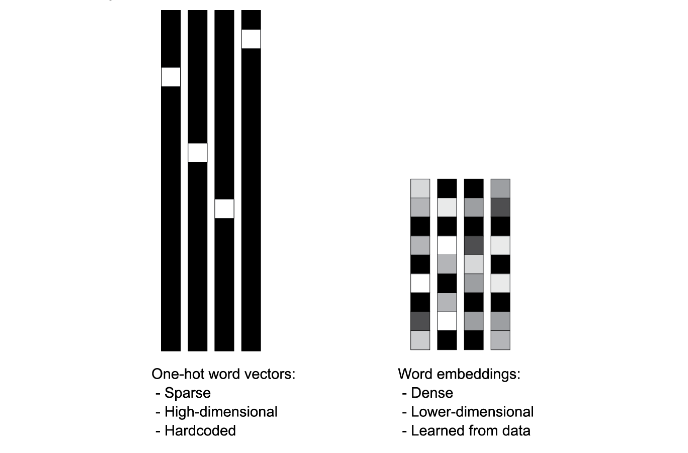

Word Embeddings son **representaciones estructuradas** y su **estructura se aprende de los datos**. Las **palabras similares se incrustan en lugares cercanos** y, además, las **direcciones específicas en el espacio de incrustación son significativas**.

Ejemplo de cuatro palabras incrustadas en un plano 2D donde **algunas relaciones semánticas entre estas palabras se pueden codificar como transformaciones geométricas**: **el mismo vector nos permite pasar de gato a tigre** y de perro a lobo: **este vector podría interpretarse como el vector “de mascota a animal salvaje”**. Otro **vector nos permite pasar de perro a gato y de lobo a tigre**, lo que podría interpretarse como **un vector “de canino a felino”**.

**Un ejemplo de juguete de un espacio de word Embeddings.**

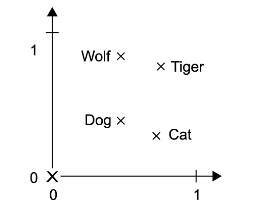

En los espacios de Word Embeddings del mundo real, los **vectores de "género"** y los **vectores "plurales"** son **ejemplos comunes de transformaciones geométricas significativas**. Por ejemplo, al **agregar un vector "femenino" al vector "rey", obtenemos el vector "reina"**. Al a**gregar un vector "plural", obtenemos "reyes"**. Los espacios de Word Embeddings suelen presentar **miles de estos vectores interpretables y potencialmente útiles**.

* Dos formas de obtener Word Embeddings: 
  * **Aprendemos Word Embeddings junto con la tarea principal** (clasificación de documentos, predicción de sentimientos, etc). Comenzamos con **vectores de palabras aleatorias** y **luego aprendemos vectores de palabras de la misma manera que aprendemos los pesos de una red neuronal**. 
  * Cargamos en nuestro modelo **Word Embeddings que se calcularon previamente mediante una tarea de aprendizaje automático diferente** a la que está tratando de resolver. Estos se denominan **Pre-trained Word Embeddings**. 

Revisemos cada uno de estos enfoques.

#### Aprendiendo incrustación de palabras (word embeddings) con una capa Embedding

* Hay que tener en cuenta que **hay muchos idiomas diferentes y no son isomorfos entre sí**, porque un idioma es el reflejo de una cultura específica y un contexto específico.
* Lo que hace que un **espacio de Word Embedding sea bueno depende** en gran medida de **para que tarea se utilice**: el espacio de Word Embedding perfecto para un modelo de análisis de sentimientos de reseñas de películas en inglés puede ser diferente del espacio Word Embedding perfecto para un modelo de clasificación de documentos legal en inglés, porque **la importancia de ciertas relaciones semánticas varía de una tarea a otra**. 

* Por tanto, es **razonable aprender un nuevo espacio de Word Embedding con cada nueva tarea**. La retropropagación hace fácil esta labor, y Keras lo hace aún más fácil. **Se trata de aprender los pesos de una capa: la capa de ``Embedding``**.

**Instanciando una capa `Embedding`**

In [36]:
# La capa de Embedding toma al menos dos argumentos: el número de tokens 
# posibles y la dimensionalidad de los Embeddings (aquí, 256).
embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=256)

La **capa ``Embedding``** se entiende mejor como un **diccionario que asigna índices enteros (que representan palabras específicas) a vectores densos**.

**La capa ``Embedding``**

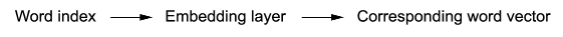

* La capa ``Embedding`` toma como entrada un tensor de números enteros de rango 2, de forma ``(batch_size, sequence_length)``, donde cada entrada es una secuencia de números enteros. Luego, la capa devuelve un tensor 3D coma flotante con la forma ``(batch_size, sequence_length, embedding_dimensionality)``. 

* Cuando instanciamos una capa ``Embedding``, sus **pesos** (su diccionario interno de vectores de token) son **inicialmente aleatorios**, al igual que con cualquier otra capa. Durante el entrenamiento, **estos vectores de palabras se ajustan gradualmente a través de la retropropagación**, estructurando el espacio en algo que el modelo posterior pueda explotar. Una vez que esté completamente entrenado, el espacio de embedding mostrará mucha estructura, un tipo de **estructura especializada para el problema específico para el que estemos entrenando nuestro modelo**. 

Construyamos un modelo que incluya una capa de ``Embedding`` veamos como funciona con nuestra tarea.

**Modelo que usa una capa `Embedding` entrenada desde cero**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint("embeddings_bidir_gru.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10, callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

* Entrena **mucho más rápido que el modelo one-hot** (dado que el LSTM solo tiene que procesar vectores de 256 dimensiones en lugar de 20.000 dimensiones), y su **precisión de prueba es comparable (87%)**. 
* Todavía **lejos de los resultados del modelo bigrama básico.** (Parte porque que el modelo analiza un poco menos de datos: bigrama procesó revisiones completas, nuestro modelo de secuencia trunca las secuencias después de 600 palabras).

#### Entendiendo relleno (padding) y enmascaramiento (masking)

* **Afecta el rendimiento** del modelo que las **secuencias de entrada están llenas de ceros**. Viene del uso de la opción ``output_sequence_length=max_ length`` en ``TextVectorization`` (con ``max_length`` igual a 600). Oraciones > 600 tokens se truncan a  600 tokens, y oraciones < 600 tokens se rellenan con ceros al final para que que se pueden concatenar junto con otras secuencias para formar lotes contiguos.
* Usamos un **RNN bidireccional**:(RNN en orden natural **pasará sus últimas iteraciones viendo solo vectores que codifican el relleno** (cientos si la oración es corta)) -> **Información almacenada en el estado interno de la RNN se desvanecerá gradualmente** a medida que se exponga a estas entradas sin sentido.
* Para **decirle a la RNN que omita estas iteraciones** se hace desde la API con el enmascaramiento (**masking**).

* La capa de ``Embedding`` es capaz de **generar una "máscara" que corresponde a sus datos de entrada** (tensor de unos y ceros o valores booleanos verdadero/falso, de forma ``(batch_size, sequence_length)``, donde la la entrada ``mask[i, t]`` indica dónde se debe omitir (=0 o ``False``) o no (=1 o ``True``) el timestep ``t`` de la muestra ``i``).

* Opción no activa de forma predeterminada. Se activa con ``mask_zero=True`` en la capa embedding. Se puede recuperar la máscara con el método ``compute_mask()``:

In [38]:
embedding_layer = layers.Embedding(input_dim=10, output_dim=256, mask_zero=True)
some_input = [
    [4, 3, 2, 1, 0, 0, 0],
    [5, 4, 3, 2, 1, 0, 0],
    [2, 1, 0, 0, 0, 0, 0]]
mask = embedding_layer.compute_mask(some_input)

In [39]:
mask

<tf.Tensor: shape=(3, 7), dtype=bool, numpy=
array([[ True,  True,  True,  True, False, False, False],
       [ True,  True,  True,  True,  True, False, False],
       [ True,  True, False, False, False, False, False]])>

In [40]:
print(mask)

tf.Tensor(
[[ True  True  True  True False False False]
 [ True  True  True  True  True False False]
 [ True  True False False False False False]], shape=(3, 7), dtype=bool)


* Casi nunca tendremos que manejar las máscaras a mano: **Keras pasará automáticamente la máscara a cada capa** que es capaz de procesarla (como una pieza de metadatos adjuntos a la secuencia que representa). 
* Esta **máscara será utilizada por capas RNN para omitir pasos enmascarados**. 
* Si el modelo devuelve una secuencia completa, la función de pérdida también utilizará la máscara para omitir pasos enmascarados en la secuencia de salida.

Volvemos a entrenar nuestro modelo con el enmascaramiento habilitado:

**Usando una capa `Embedding` con enmascaramiento (masking) activado**

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(
    input_dim=max_tokens, output_dim=256, mask_zero=True)(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint("embeddings_bidir_gru_with_masking.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10, callbacks=callbacks)
model = keras.models.load_model("embeddings_bidir_gru_with_masking.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Esta vez llegamos al **88% de precisión con los datos de test, una mejora pequeña pero notable**.

#### Usando word embeddings preentrenados

* Cuando **se tienen pocos datos para entrenar** en las tareas específicas junto con el aprendizaje del embedding, **podemos cargar vectores embeddings precalculados** basados en estadísticas de ocurrencia de palabras en documentos (al igual que se hace con las convnets preentrenadas).
* La idea viene de [Yoshua Bengio et al., “A Neural Probabilistic Language Model,” Journal of Machine Learning Research (2003)](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)
* El esquema de Word Embedding más conocido es algoritmo Word2Vec [https://code.google.com/archive/p/word2vec](https://code.google.com/archive/p/word2vec), desarrollado por Tomas Mikolov en Google en 2013.
* Otro popular se llama Vectores globales (**GloVe**): [https://nlp.stanford.edu/projects/glove](https://nlp.stanford.edu/projects/glove), desarrollado por investigadores de Stanford en 2014.
* Usaremos los Word Embeddings de GloVe en un modelo de Keras (aplicable a cualquier otro, como Word2Vec). Comenzaremos descargando los archivos de GloVe y analizándolos. Luego cargaremos los vectores de palabras en una capa ``Embedding`` de Keras, que usaremos para construir un nuevo modelo.

Descargamos el Word Embeddings de GloVe precalculadas en el conjunto de datos de Wikipedia en inglés de 2014. Es un archivo zip de 822MB que contiene vectores de embeddings de 100 dimensiones para 400.000 palabras:

In [42]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-02-19 10:30:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-02-19 10:30:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-02-19 10:30:30--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Analicemos el archivo descomprimido (un archivo .txt) para crear un índice que asigne palabras (como cadenas) a su representación vectorial.

**Analizando (parsing) el fichero word-embeddings de GloVe**

In [43]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors.")

Found 400000 word vectors.


Ahora construimos una matriz de embedding que podemos cargar en una capa de ``Embedding``. Debe ser una matriz con la forma ``(max_words, embedding_dim)``, donde cada entrada ``i`` contiene el vector dimensional ``embedding_dim`` para la palabra del índice ``i`` en el índice de referencia de palabras(construido durante la tokenización).

**Preparando la matriz word-embeddings de GloVe**

In [44]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    # Configura la capa para devolver secuencias de palabras 
    # codificadas como índices enteros. Hay varios otros modos 
    # de salida disponibles, que veremos en acción
    output_mode="int",
)

In [45]:
embedding_dim = 100

# Recuperamos el vocabulario indexado por nuestra capa de 
# TextVectorization anterior.
vocabulary = text_vectorization.get_vocabulary()
# Lo usamos para crear una asignación de palabras a su 
# índice en el vocabulario.
word_index = dict(zip(vocabulary, range(len(vocabulary))))

# Preparamos una matriz que llenaremos con los vectores GloVe.
embedding_matrix = np.zeros((max_tokens, embedding_dim))
for word, i in word_index.items():
    if i < max_tokens:
        embedding_vector = embeddings_index.get(word)
    # Completamos la entrada i en la matriz con el vector de palabras 
    # para el índice i. Las palabras que no se encuentran en el índice 
    # de embedding serán todos ceros
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Finalmente, usamos un inicializador ``Constant`` para cargar los embeddings preentrenados en una capa ``Embedding``. Para no interrumpir las representaciones preentrenadas durante el entrenamiento, congelamos la capa a través de ``trainable=False``:

In [46]:
embedding_layer = layers.Embedding(
    max_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    mask_zero=True,
)

Entrenamos un nuevo modelo, idéntico a nuestro al anterior, pero con las Word Embeddings de GloVe, preentrenadas de 100 dimensiones en lugar de las Word Embeddings aprendidas de 128 dimensiones.

**Modelo que usa a una capa Embedding preentrenada**

In [47]:
inputs = keras.Input(shape=(None,), dtype="int64")
embedded = embedding_layer(inputs)
x = layers.Bidirectional(layers.LSTM(32))(embedded)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint("glove_embeddings_sequence_model.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=10, callbacks=callbacks)
model = keras.models.load_model("glove_embeddings_sequence_model.keras")
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 100)         2000000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,034,113
Trainable params: 34,113
Non-trainable params: 2,000,000
____________________________________________

Vemos que para esta tarea en particular, las Word Embeddings preentrenadas no son muy útiles, porque el conjunto de datos contiene suficientes muestras para que sea posible aprender un espacio de Word Embeddings lo suficientemente especializado desde cero. Sin embargo, aprovechar las Word Embeddings previamente entrenadas puede ser muy útil cuando trabajamos con un conjunto de datos más pequeño.